Summary
contains 23,922 rows and 25 columns
Needs to be cleaned for proper analysis.
Some performance score columns like goalkeeper, offense, and midfield have significant missing data. 
Teams and countries span multiple continents, enabling geographic analysis.
This dataset would be useful for analyzing trends in team performance, rankings, and match outcomes over time.

I will be analyzing some 3 interesing facts I would like to find out
- Match Outcome Trends Over Time
- Top 10 Highest Scoring Matches
- Average FIFA Points by Continent


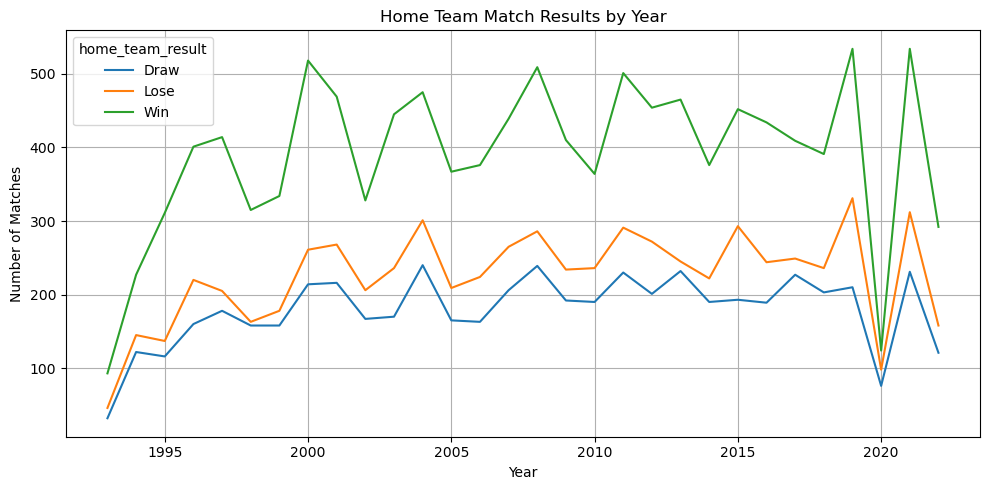

🔝 Top 10 Highest Scoring Matches:
            date           home_team               away_team  home_team_score  \
5410  2001-04-11           Australia          American Samoa               31   
5408  2001-04-09           Australia                   Tonga               22   
8740  2005-03-11                Guam               Korea DPR                0   
5091  2000-11-24             IR Iran                    Guam               19   
4145  2000-01-26            China PR                    Guam               19   
13539 2010-10-14  Dominican Republic  British Virgin Islands               17   
4676  2000-06-19           Australia            Cook Islands               17   
2349  1997-06-02            Maldives                 IR Iran                0   
3309  1998-09-28           Australia            Cook Islands               16   
5094  2000-11-26          Tajikistan                    Guam               16   

       away_team_score  total_goals  
5410                 0           31 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_excel("/Users/saajay/Desktop/GitHub/Ds311_Group_5_Repo/work-in-progress-Saajay-Singh/fifa_world_cup_cleaned.xlsx")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


# 1. Matched Outcome Trends Over Time

df['year'] = df['date'].dt.year
results_by_year = df.groupby(['year', 'home_team_result']).size().unstack().fillna(0)

# Optional: Plot the trend
results_by_year.plot(kind='line', title='Home Team Match Results by Year', figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Top 10 Highest Scoring Matches

df['total_goals'] = df['home_team_score'] + df['away_team_score']
top_scoring_matches = df.sort_values(by='total_goals', ascending=False).head(10)
print("🔝 Top 10 Highest Scoring Matches:")
print(top_scoring_matches[['date', 'home_team', 'away_team', 'home_team_score', 'away_team_score', 'total_goals']])


# 3. Average FIFA Points by Continent

continent_points = df.groupby('home_team_continent')[['home_team_total_fifa_points']].mean().sort_values(by='home_team_total_fifa_points', ascending=False)
print("\n🌍 Average FIFA Points by Continent:")
print(continent_points)


*trying to fix my folder may11*
